## Flowers image classification workshop

### Basic task in computer vision

#### Image classification
- Classify a whole image in a category
  - Binary classification (Hot dog vs Not hot dog)
  ![alt text](https://cdn-images-1.medium.com/max/1200/1*VrpXE1hE4rO1roK0laOd7g.png "Silicon Valley")
  - Multi-class classification (ImageNet with 1 000 classes)
- Classes are defined prior to training
  - Let's say we trained a multi-class classificator with three classes
    - Car
    - Boat
    - Plane
  - We present an image of a dog to this model
  - The model will classify the dog as either a car, a boat or a plane.
- Popular network architecture include
  - VGG
  - Inception v3
  - ResNet Inception
  - ResNet
  - Xception
  
  ![alt text](https://github.com/zaxcie/flower_workshop/releases/download/v0.1/class.png "Class Cat")


#### Object localization
- Localize an object in an image
- Will only localize specific class of object
- It's basicly like putting a bounding box around objects
- Bounding box can overlap
- Popular network architecture include
  - YOLO (You Only Look Once)
  - R-CNN
  - SSD
  - RetinaNet

![alt text](https://github.com/zaxcie/flower_workshop/releases/download/v0.1/Loc.png "Class Cat")

#### Object segmentation
- Similar to image localization.
- Localize an object in an image.
- Instead of putting bounding box, does a pixel level segmentation.
- Popular network architecture include
  - Masknet
  - Mask RCNN

![alt text](https://github.com/zaxcie/flower_workshop/releases/download/v0.1/Segment.png "Class Cat")

#### Image generation
- Style transfer
![alt text](https://cdn-images-1.medium.com/max/1600/1*MAjeF5fiRosZP6PMtAQp_Q.jpeg "Class Cat")
https://deepart.io/

- Image generation


### Image classification

#### How do human recognize car?
- Rectangular-box shape
- 4 wheels
- Pair of headlights
- Pair of Tail lights
- etc...

#### How do human differenciate between car make/model?
- Square-shaped vs round-shaped
- Number of doors
- **It's hard to precisely identify rules**

#### Concolutional Neural Network (CNN)
**What is a kernel conceptually?**
- Is a small matrix.
- For each pixel of the image, we apply a convolution between the image and the kernel.
- A convolution is similar to a matrix multiplication.
- Can be use for multiple purpose
  - Edge Detection
  
  ![alt text](http://aishack.in/static/img/tut/conv-edge-detection.jpg "Inception V3")
  
  ![alt text](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/51124/versions/1/screenshot.jpg "Inception V3")
  - Blur
  
  ![alt text](http://aishack.in/static/img/tut/conv-simple-blur.jpg "Inception V3")
  
  ![alt text](https://doc.qt.io/qt3dstudio/images/Effects-GaussianBlur.png "Inception V3")
  - Laplacian operator
  
  ![alt text](http://aishack.in/static/img/tut/conv-laplacian.jpg "Inception V3")
  
  ![alt text](http://aishack.in/static/img/tut/conv-laplacian-result.png "Inception V3")

**Learning the kernel**
- Convolutional Neural Network allow to learn the kernel
- The idea behind CNN is to stack convolution in a deep network
- The intuition is that by stacking convolution the network will learn feature relevant to the task
  - Edges
  - Shape
  - Shape patterns
  - Color patterns
- The deeper, the more complex and specific the features are

![alt text](http://cs231n.github.io/assets/cnn/convnet.jpeg "Inception V3")

**Inception v3**
- Proposed by in 2015
- When introduced, was the state of the art
- Trained on ImageNet2012, which is a big dataset of image with labels
- Original paper - https://arxiv.org/abs/1512.00567
![alt text](https://d255esdrn735hr.cloudfront.net/graphics/9781786466587/graphics/image_08_007.jpg "Inception V3")

### Flowers dataset
4 242 images of flowers. Data is based on Flickr, Google Images and Yandex Image.
Images are split into 5 categories
- Chamomile
- Tulip
- Rose
- Sunflower
- Dandelion

Every classes has about 800 images. Dimension of image isn't fixed.

In [2]:
%load_ext autoreload
%autoreload 2\

import os
import random

from skimage.io import imread, imshow

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


In [2]:
def show_images_horizontal(path, n=5):
    files = random.sample(os.listdir(path), 5)
    images = list()
    
    for file in files:
        images.append(mpimg.imread(path + file))
    
    plt.figure(figsize=(20, 10))
    columns = 5
    for i, image in enumerate(images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        plt.imshow(image)

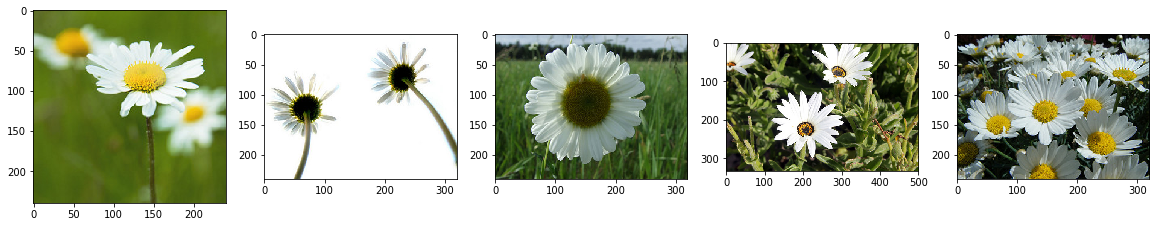

In [6]:
path = "../../input/data/train/daisy/"
show_images_horizontal(path)

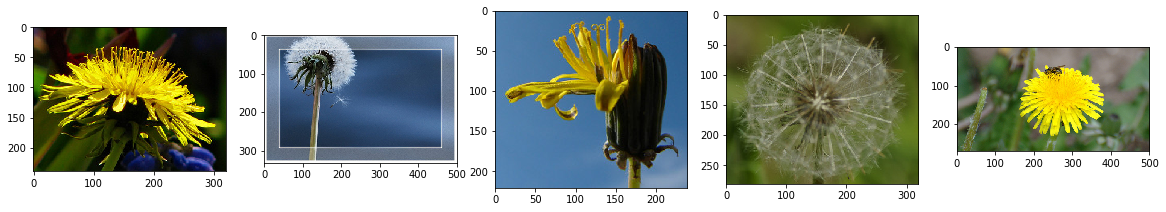

In [5]:
path = "../../input/data/train/dandelion/"
show_images_horizontal(path)

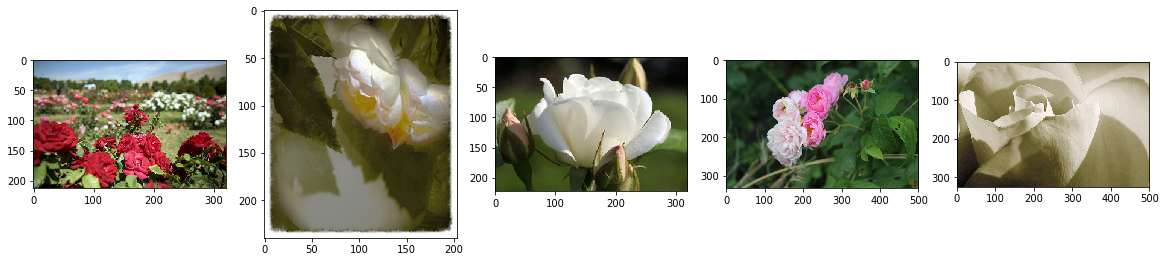

In [6]:
path = "../../input/data/train/roses/"
show_images_horizontal(path)

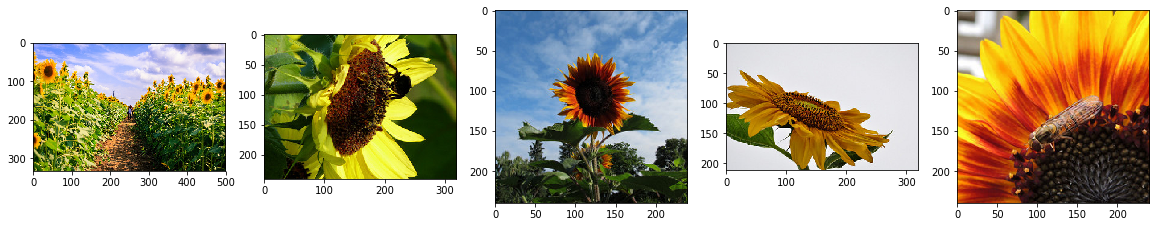

In [6]:
path = "../../input/data/train/sunflowers/"
show_images_horizontal(path)

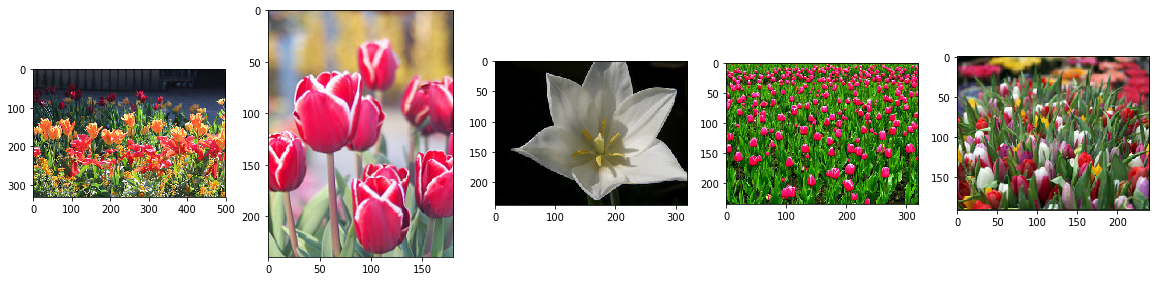

In [7]:
path = "../../input/data/train/tulips/"
show_images_horizontal(path)

In [3]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

Using TensorFlow backend.


In [5]:
img_width, img_height = 299, 299
train_data_dir = "../../input/data/train"
validation_data_dir = "../../input/data/val"
batch_size = 32  # That's an hyperparameter that can be tuned.
                 # The bigger the batch size, the bigger the memory foot print
epochs = 50

In [6]:
model = InceptionV3(weights = "imagenet",
                    include_top=False,
                    input_shape = (img_width, img_height, 3))


![alt text](https://d255esdrn735hr.cloudfront.net/graphics/9781786466587/graphics/image_08_007.jpg "Inception V3")

In [10]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [5]:
# Adding new layers 
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # 1024 is an parameter. It could be tuned to see if 2048
                                       # 512 or any other numbers give better results
                                       # In the original paper, that layer is 2048
predictions = Dense(5, activation="softmax")(x)  # 5, because we have 5 classes

model_final = Model(input = model.input, output = predictions)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys


In [6]:
# Apply data augmentation using Keras ImageDataGenerator
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,  # Super important!
                                                        # Else, the initial weights are useless
# https://github.com/keras-team/keras-applications/blob/master/keras_applications/inception_v3.py
                                    rotation_range=30,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

In [7]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [8]:
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")

validation_generator = test_datagen.flow_from_directory(
validation_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical")

Found 2934 images belonging to 5 classes.
Found 736 images belonging to 5 classes.


In [8]:
for index, layer in enumerate(model_final.layers):
    print(index, layer.name)

0 input_1
1 conv2d_1
2 batch_normalization_1
3 activation_1
4 conv2d_2
5 batch_normalization_2
6 activation_2
7 conv2d_3
8 batch_normalization_3
9 activation_3
10 max_pooling2d_1
11 conv2d_4
12 batch_normalization_4
13 activation_4
14 conv2d_5
15 batch_normalization_5
16 activation_5
17 max_pooling2d_2
18 conv2d_9
19 batch_normalization_9
20 activation_9
21 conv2d_7
22 conv2d_10
23 batch_normalization_7
24 batch_normalization_10
25 activation_7
26 activation_10
27 average_pooling2d_1
28 conv2d_6
29 conv2d_8
30 conv2d_11
31 conv2d_12
32 batch_normalization_6
33 batch_normalization_8
34 batch_normalization_11
35 batch_normalization_12
36 activation_6
37 activation_8
38 activation_11
39 activation_12
40 mixed0
41 conv2d_16
42 batch_normalization_16
43 activation_16
44 conv2d_14
45 conv2d_17
46 batch_normalization_14
47 batch_normalization_17
48 activation_14
49 activation_17
50 average_pooling2d_2
51 conv2d_13
52 conv2d_15
53 conv2d_18
54 conv2d_19
55 batch_normalization_13
56 batch_norma

In [9]:
# Save the model according to the conditions  
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=1, verbose=1, mode='auto')


In [10]:
# We want to freeze all layers, except that one we just added
# Since these layers are the only one initialized randomly
for layer in model_final.layers[:311]:
    layer.trainable = False
for layer in model_final.layers[311:]:
    layer.trainable = True

In [11]:
# compile the model 
model_final.compile(loss = "categorical_crossentropy",
                    optimizer = "rmsprop",  # That's an hyperparameter
                    metrics=["accuracy"])


In [12]:
# Train the model 
model_final.fit_generator(
train_generator,
samples_per_epoch = 2934,  # Total number of images in train set
epochs = 1,
validation_data = validation_generator,
nb_val_samples = 736/batch_size,  #Total number of images in val set divided by batch size
callbacks = [early])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=1, validation_data=<keras_pre..., callbacks=[<keras.ca..., steps_per_epoch=91, validation_steps=23.0)`
  


Epoch 1/1
91/91 [==============================] - 81s 888ms/step - loss: 1.7672 - acc: 0.5587 - val_loss: 1.8322 - val_acc: 0.4755


In [28]:
# Un freeze every layers
for layer in model_final.layers:
    layer.trainable = True
    
# compile the model. Need to do that.
model_final.compile(loss = "categorical_crossentropy",
                    optimizer = "rmsprop",  # That's an hyperparameter
                    metrics=["accuracy"])

# Train the model 
model_final.fit_generator(
train_generator,
samples_per_epoch = 2934,
epochs = epochs,
validation_data = validation_generator,
nb_val_samples = 736/batch_size,
callbacks = [early])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=50, validation_data=<keras_pre..., callbacks=[<keras.ca..., steps_per_epoch=91, validation_steps=23.0)`
  


Epoch 1/50
91/91 [==============================] - 95s 1s/step - loss: 1.4906 - acc: 0.3911 - val_loss: 1.3532 - val_acc: 0.5584
Epoch 2/50
91/91 [==============================] - 82s 903ms/step - loss: 1.1940 - acc: 0.6681 - val_loss: 1.1069 - val_acc: 0.6943
Epoch 3/50
91/91 [==============================] - 85s 930ms/step - loss: 0.9620 - acc: 0.7581 - val_loss: 0.9323 - val_acc: 0.7269
Epoch 4/50
91/91 [==============================] - 84s 929ms/step - loss: 0.8020 - acc: 0.7919 - val_loss: 0.7911 - val_acc: 0.7704
Epoch 5/50
91/91 [==============================] - 84s 919ms/step - loss: 0.6858 - acc: 0.8138 - val_loss: 0.6932 - val_acc: 0.7989
Epoch 6/50
91/91 [==============================] - 84s 927ms/step - loss: 0.5964 - acc: 0.8319 - val_loss: 0.6249 - val_acc: 0.8166
Epoch 7/50
91/91 [==============================] - 84s 923ms/step - loss: 0.5358 - acc: 0.8521 - val_loss: 0.5740 - val_acc: 0.8234
Epoch 8/50
91/91 [==============================] - 84s 921ms/step - los

### Tips
- Be careful with your batch size, it can endup consumming a lot of memory
- Data augmentation can make a huge difference
- Take a look at your data, especially those images that were miss classified
- At first, try to overfit a small dataset to prove your network can converge and that there is signal in your data
- GPU computing is more than 10x faster than CPU